Name: Hikmet Terzioglu

ID: 161101071

Course: BIL570 / YAP470

In [69]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from sklearn.model_selection import train_test_split # type: ignore

# Exploratory Data Analysis (EDA) for IRIS

In [70]:
iris = pd.read_csv('Iris.csv')

In [71]:
class_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris['Species'] = iris['Species'].map(class_mapping)

In [72]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [73]:
iris.shape

(150, 6)

In [74]:
iris.to_csv("iris_converted.csv", index=False)

In [75]:
iris.dtypes


Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [76]:
import plotly.express as px # type: ignore

In [77]:
px.pie(iris, 'Species', color='Species',color_discrete_sequence=['#007500','#5CFF5C'],title='Data Distribution')

Her dilim, kendi sınıfının veri kümesindeki oranını göstermekte ve dilimlerin her biri eşit büyüklüktedir. Bu da her sınıfın veri kümesinde eşit miktarda veri noktası içerdiğini göstermektedir.

In [78]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5
Species,150.0,1.000000,0.819232,0.0,0.00,1.00,2.00,2.0


In [79]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [80]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


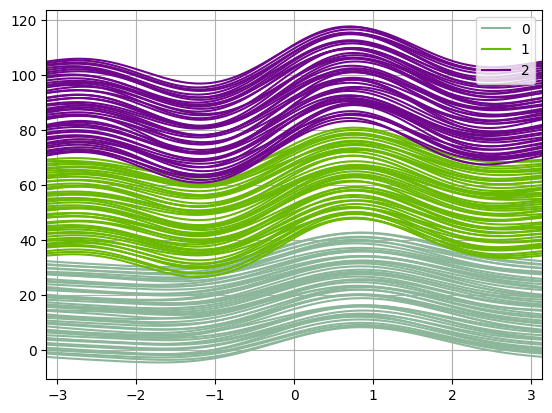

In [81]:
pd.plotting.andrews_curves(iris, "Species")
plt.show()

Bu görsel, farklı sınıflara ait verilerin Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, ve PetalWidthCm değişkenleri üzerinden dağılımını göstermektedir. Grafikte:

Sınıf 0: Yeşil renkte gösterilmiştir.
Sınıf 1: Açık yeşil renkte gösterilmiştir.
Sınıf 2: Mor renkte gösterilmiştir.
Verilerin Id değişkeninde yoğunlaştığı ve diğer değişkenlerde daha düşük değerlere sahip olduğu görülmektedir. Bu, veri noktalarının ID bazında sıralandığını ve diğer değişkenlerde daha az farkın olduğunu gösterir.

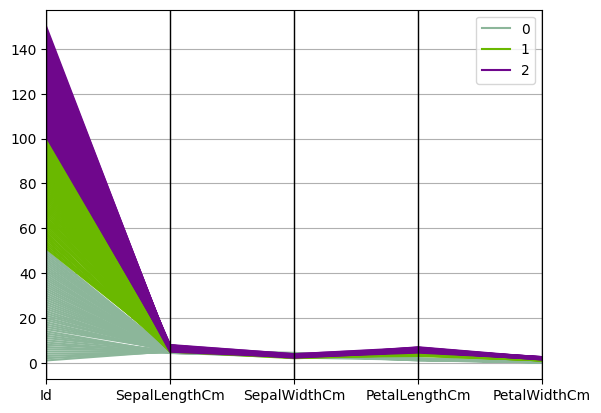

In [82]:
pd.plotting.parallel_coordinates(iris, "Species")
plt.show()

Görsel 2: Parallel Coordinates Plot (Paralel Koordinatlar Grafiği)
Bu görsel, farklı sınıfların çeşitli değişkenler üzerindeki dağılımlarını karşılaştırmak için kullanılmıştır. Grafikte:

Sınıf 0: Yeşil renkte gösterilmiştir.
Sınıf 1: Açık yeşil renkte gösterilmiştir.
Sınıf 2: Mor renkte gösterilmiştir.
Grafikte her bir çizgi bir veri noktasıdır ve her bir sınıfın diğer sınıflarla karşılaştırıldığında değişkenler üzerindeki dağılımı gösterilmektedir. Sınıflar arasında belirgin bir ayrım olduğu ve her sınıfın belirli bir aralıkta yoğunlaştığı görülmektedir. Bu, verilerin sınıflar arasında belirgin bir ayrım yapabildiğini gösterir.

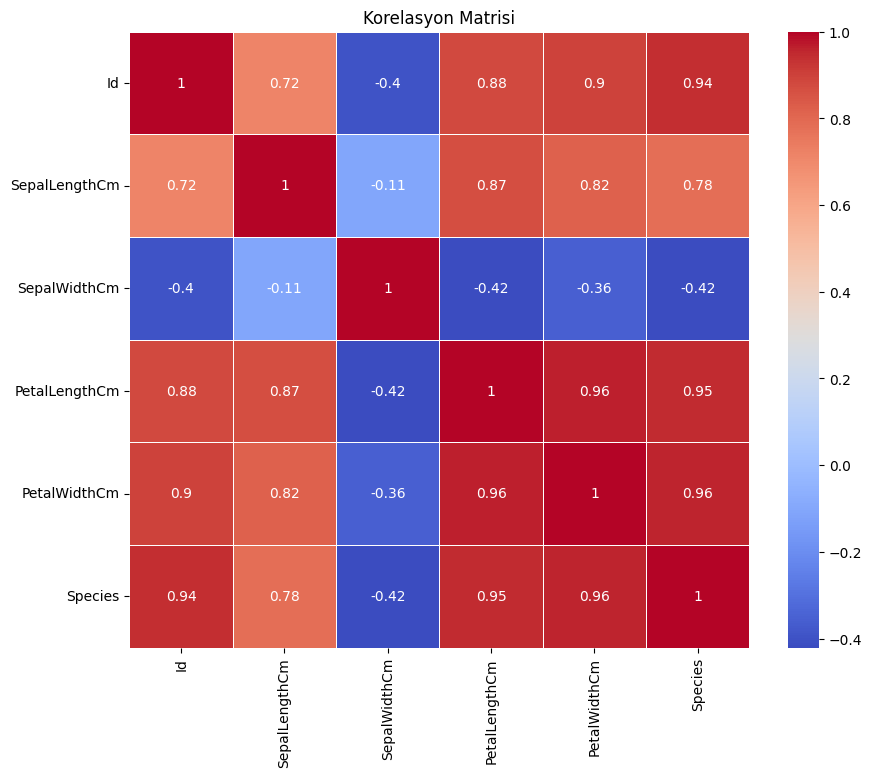

In [83]:

correlation_matrix = iris.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

Yukarıdaki korelasyon matrisi, Iris veri setindeki öznitelikler arasındaki ilişkiyi göstermektedir. Her hücre, iki değişken arasındaki korelasyon katsayısını temsil eder ve bu değer -1 ile 1 arasında değişir. Değerin büyüklüğü, ilişkinin gücünü; işareti ise ilişkinin yönünü belirtir.

PetalLengthCm ve PetalWidthCm: Aralarında 0.96 gibi yüksek bir pozitif korelasyon vardır, bu da uzunluk arttıkça genişliğin de arttığını gösterir.
SepalLengthCm ve PetalLengthCm: Aralarında 0.87 gibi güçlü bir pozitif korelasyon vardır.
SepalWidthCm ve diğer öznitelikler: SepalWidthCm genellikle diğer özniteliklerle düşük veya negatif korelasyon göstermektedir.
Species: Tür sınıfı, PetalLengthCm (0.95) ve PetalWidthCm (0.96) ile yüksek korelasyon göstermektedir, bu da türlerin bu iki özellik üzerinden daha iyi ayrıldığını gösterir.

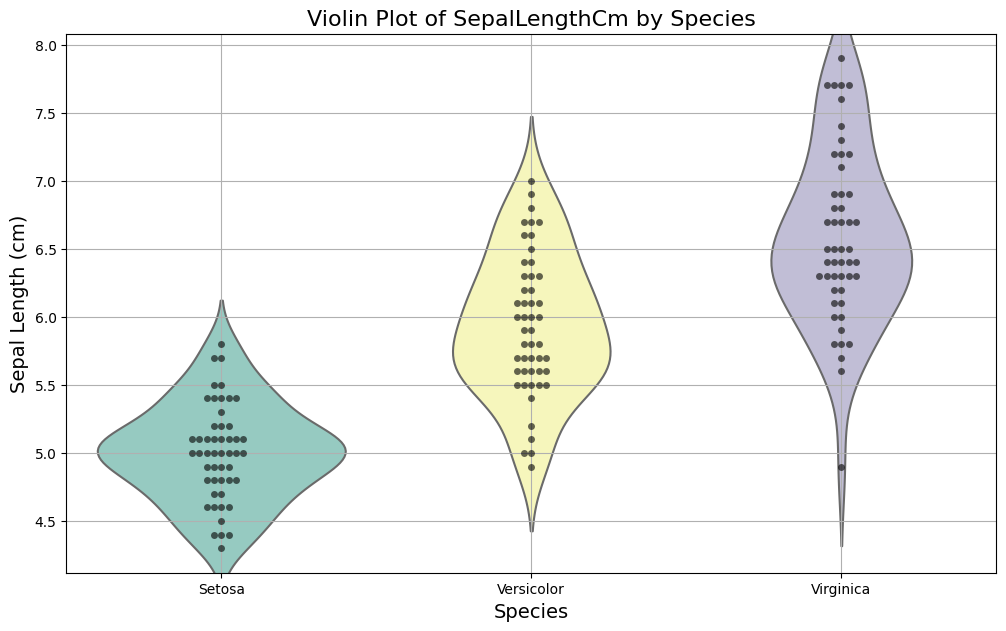

In [84]:
plt.figure(figsize=(12, 7))
sns.violinplot(x='Species', y='SepalLengthCm', data=iris, inner=None, palette='Set3', linewidth=1.5)
sns.swarmplot(x='Species', y='SepalLengthCm', data=iris, color='k', alpha=0.6)
plt.title('Violin Plot of SepalLengthCm by Species', fontsize=16)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Sepal Length (cm)', fontsize=14)
plt.xticks(ticks=[0, 1, 2], labels=['Setosa', 'Versicolor', 'Virginica'])
plt.grid(True)
plt.show()

Yukarıdaki grafik, Iris veri setindeki SepalLengthCm (Çanak Yaprağı Uzunluğu) değişkeninin üç farklı tür (Setosa, Versicolor, Virginica) arasındaki dağılımını göstermektedir. Violin plot, her bir tür için çanak yaprağı uzunluğunun yoğunluk dağılımını detaylandırırken, swarm plot ile veri noktaları ayrı ayrı gösterilmiştir. Bu sayede, her türün çanak yaprağı uzunluğu aralıkları ve yoğunluk farkları görsel olarak kolayca anlaşılabilir.

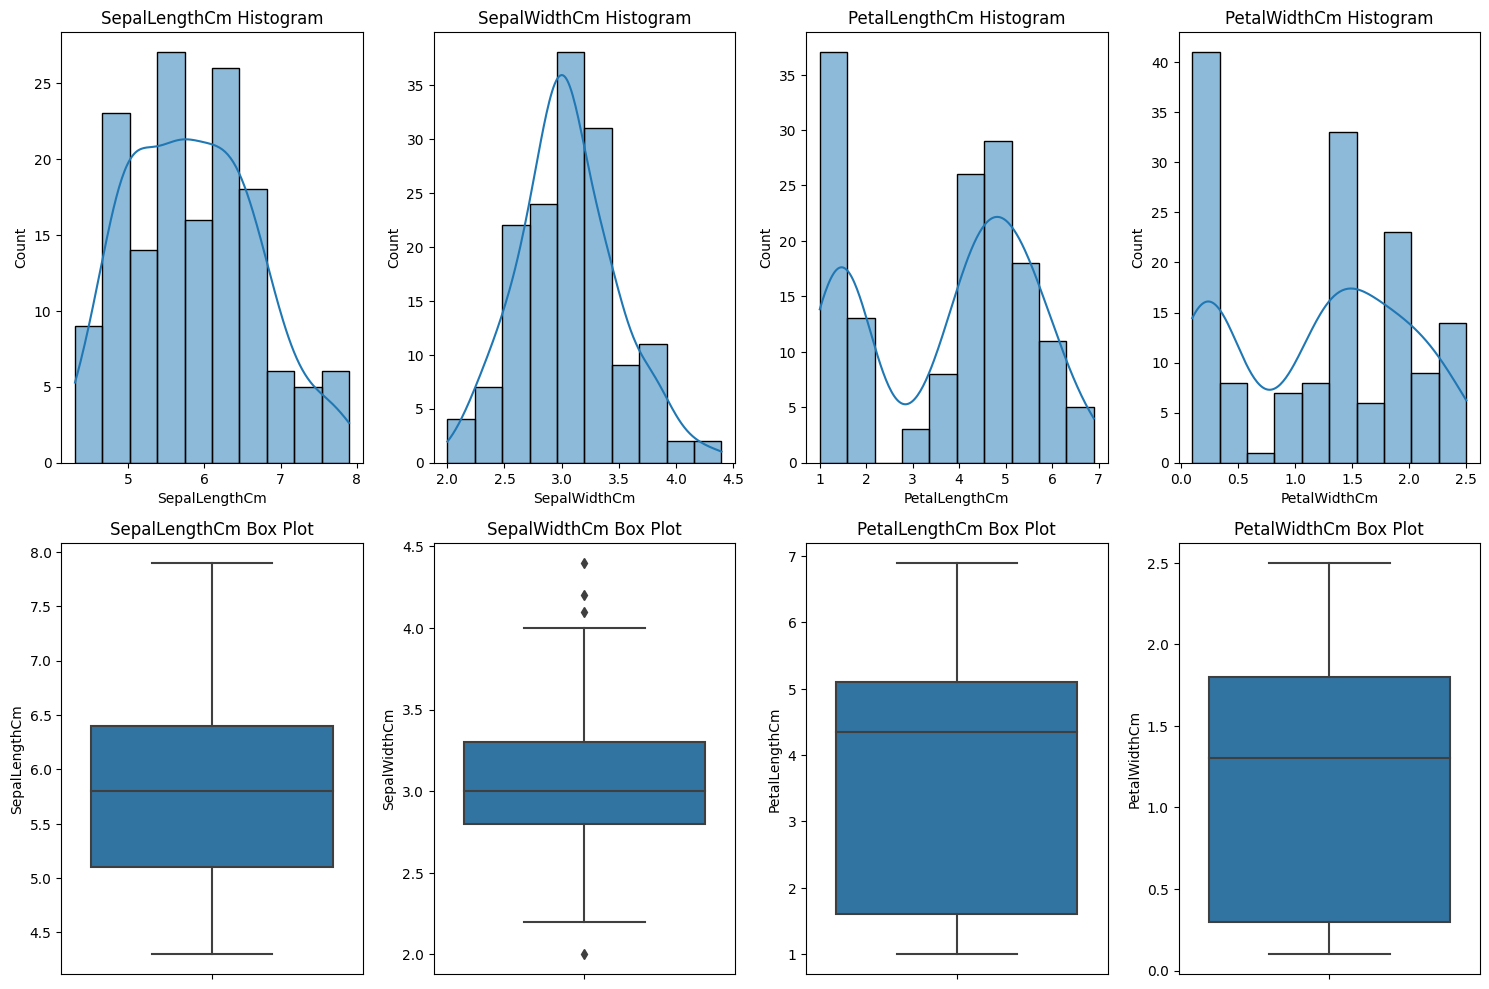

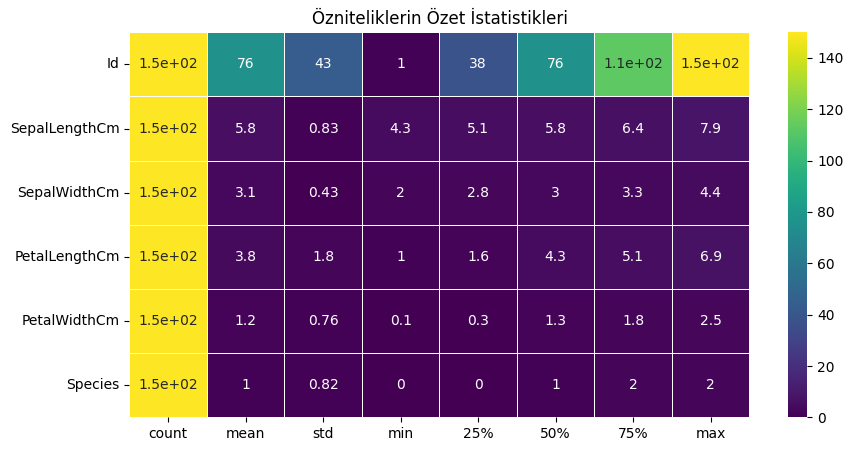

In [85]:
feature_columns = iris.columns[1:-1]


summary_stats = iris.describe()


plt.figure(figsize=(15, 10))

for i, column in enumerate(feature_columns):
    plt.subplot(2, 4, i+1)
    sns.histplot(iris[column], kde=True, bins=10)
    plt.title(f'{column} Histogram')
    
    plt.subplot(2, 4, i+5)
    sns.boxplot(y=iris[column])
    plt.title(f'{column} Box Plot')

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
sns.heatmap(summary_stats.T, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Özniteliklerin Özet İstatistikleri')
plt.show()

Yukarıdaki grafikler, Iris veri setindeki özniteliklerin dağılımını ve özet istatistiklerini görselleştirmektedir. Grafikler iki ana bölüme ayrılmıştır: histogramlar ve kutu grafikleri (box plots).

Histogramlar:
SepalLengthCm, SepalWidthCm, PetalLengthCm ve PetalWidthCm için: Her bir özniteliğin veri dağılımı histogramlar ile gösterilmiştir. Histogramlarda, KDE (Kernel Density Estimation) eğrisi de eklenmiştir, bu da veri yoğunluğunun düzgün bir temsilini sağlar.
SepalLengthCm: Çoğunlukla 5-6 cm arasında yoğunlaşmıştır.
SepalWidthCm: Yaklaşık 2.5-3.5 cm arasında yoğunlaşmıştır.
PetalLengthCm: 1-6 cm arasında geniş bir dağılım göstermektedir.
PetalWidthCm: 0.1-2.5 cm arasında değişmektedir.
Kutu Grafikler (Box Plots):
SepalLengthCm, SepalWidthCm, PetalLengthCm ve PetalWidthCm için: Her bir özniteliğin minimum, birinci çeyrek (Q1), medyan, üçüncü çeyrek (Q3) ve maksimum değerlerini göstermektedir. Ayrıca, aykırı değerler de (outliers) belirtilmiştir.
SepalLengthCm: Medyan değer 5.8 cm civarındadır ve aykırı değer içermemektedir.
SepalWidthCm: Medyan değer 3 cm civarındadır ve birkaç aykırı değer gözlemlenmiştir.
PetalLengthCm: Medyan değer 4.35 cm civarındadır ve aykırı değer içermemektedir.
PetalWidthCm: Medyan değer 1.3 cm civarındadır ve aykırı değer içermemektedir.


Isı haritası (heatmap), Iris veri setindeki özniteliklerin özet istatistiklerini göstermektedir. Her bir hücre, özniteliklerin temel istatistiksel değerlerini (ortalama, standart sapma, minimum, maksimum, çeyrekler) içerir.

Id: Özniteliği 150 değer içerir.
SepalLengthCm: Ortalama 5.8 cm, medyan 5.8 cm, min 4.3 cm, max 7.9 cm.
SepalWidthCm: Ortalama 3.1 cm, medyan 3.0 cm, min 2.0 cm, max 4.4 cm.
PetalLengthCm: Ortalama 3.8 cm, medyan 4.3 cm, min 1.0 cm, max 6.9 cm.
PetalWidthCm: Ortalama 1.2 cm, medyan 1.3 cm, min 0.1 cm, max 2.5 cm.
Species: Türler arasında dengeli bir dağılım vardır.


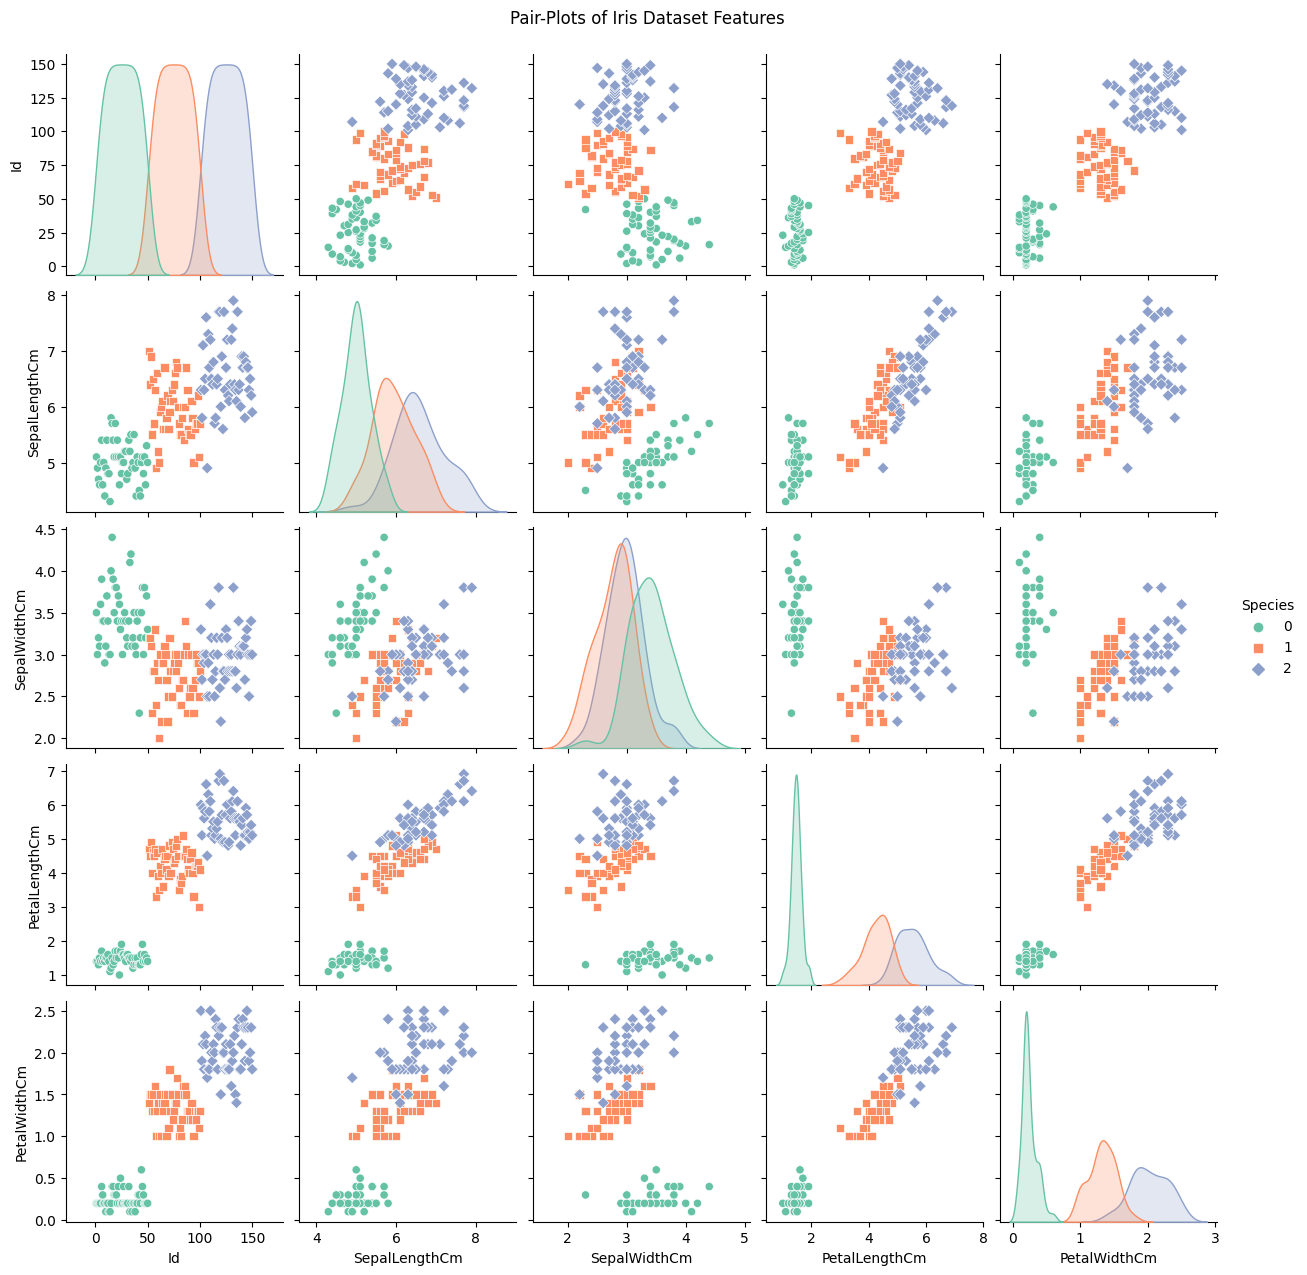

In [86]:
sns.pairplot(iris, hue='Species', markers=["o", "s", "D"], palette='Set2')
plt.suptitle('Pair-Plots of Iris Dataset Features', y=1.02)
plt.show()

Iris veri setindeki öznitelikler arasındaki ilişkileri ve türlere göre dağılımları göstermektedir. Pair-plot (çift grafik) her bir özniteliğin diğer özniteliklerle olan ilişkisini ve farklı türler arasındaki ayırt edici özellikleri görsel olarak anlamayı sağlar.

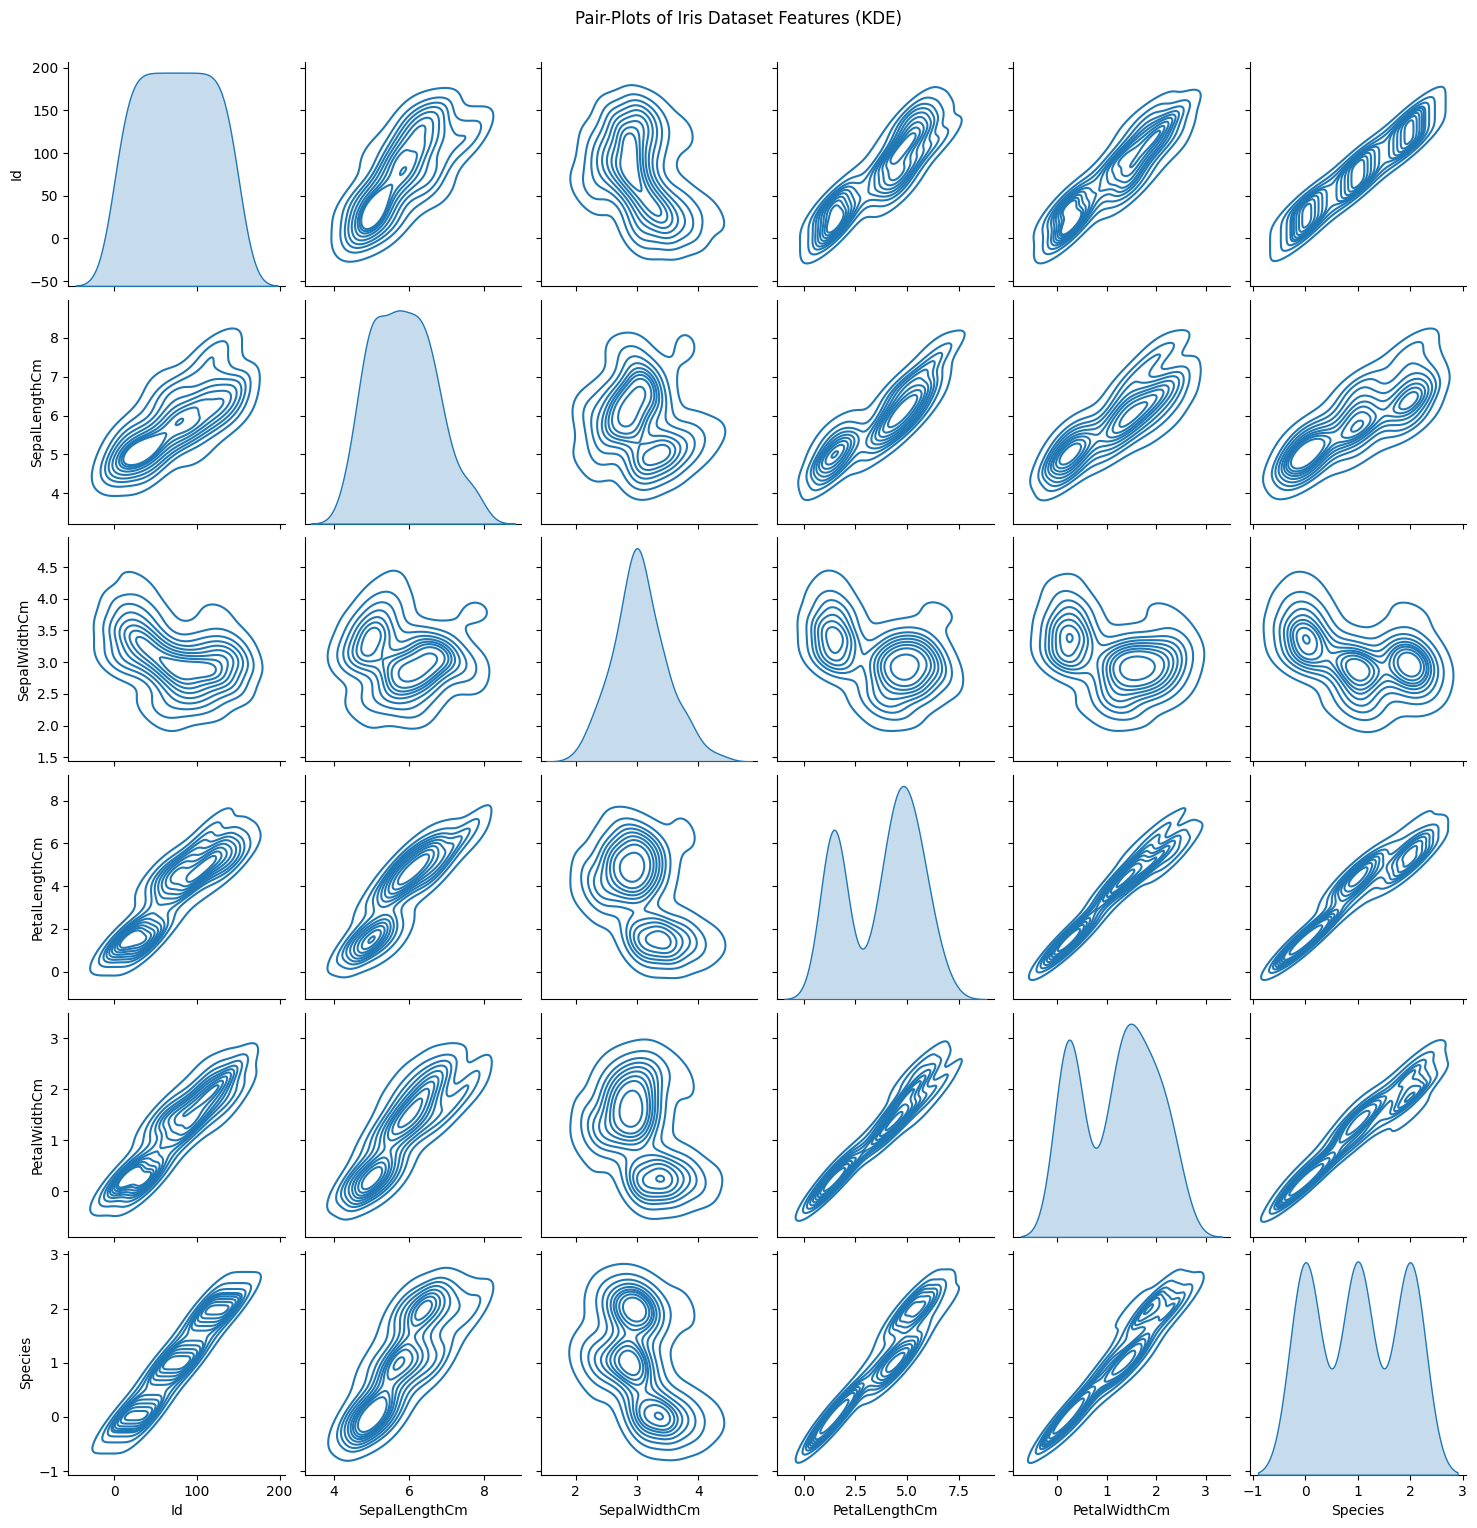

In [87]:
sns.pairplot(iris, kind="kde")
plt.suptitle('Pair-Plots of Iris Dataset Features (KDE)', y=1.02)
plt.show()

Yukarıdaki görselleştirme, Iris veri setindeki öznitelikler arasındaki ilişkileri ve dağılımları kernel density estimation (KDE) yöntemi ile göstermektedir. Bu pair-plot grafikleri, özniteliklerin ikili kombinasyonlarının yoğunluk tahminlerini sunar.

Anahtar Noktalar:
KDE (Kernel Density Estimation): KDE, veri noktalarının yoğunluklarını gösterir. Bu, verinin yoğun olduğu bölgeleri vurgulayan kontur çizgileri kullanılarak yapılır.
Çapraz Eşleşmeler: Her bir hücre, iki öznitelik arasındaki yoğunluk dağılımını gösterir. Bu sayede özniteliklerin birbiriyle olan ilişkilerini incelemek mümkündür.
Diagonal Hücreler: Diagonal hücreler, tek bir özniteliğin dağılımını gösterir. Bu hücrelerde özniteliğin yoğunluk eğrisi (density plot) yer almaktadır.
Öznitelikler: Grafikte yer alan öznitelikler şunlardır: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, ve Species.
Grafik İncelemesi:
SepalLengthCm ve SepalWidthCm: Bu iki öznitelik arasındaki ilişkiyi gösteren hücrede, verilerin yoğun olduğu bölgeler kontur çizgileri ile belirtilmiştir. Yoğunluk merkezleri verinin sıkça bulunduğu bölgeleri gösterir.
PetalLengthCm ve PetalWidthCm: Bu iki öznitelik arasındaki hücrede yoğun bir korelasyon gözlemlenebilir. Kontur çizgileri yoğunluğun nasıl değiştiğini ve hangi bölgelerde yoğunlaştığını göstermektedir.
Diagonal Hücreler: Tek özniteliğin dağılımını gösteren diagonal hücrelerde, her bir özniteliğin yoğunluk eğrisi yer alır. Bu eğriler, özniteliğin dağılımının şekli hakkında bilgi verir.

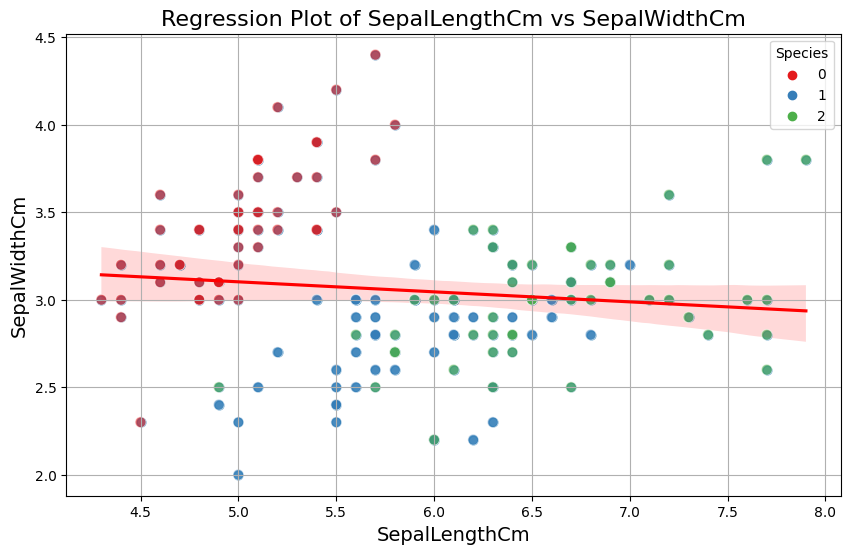

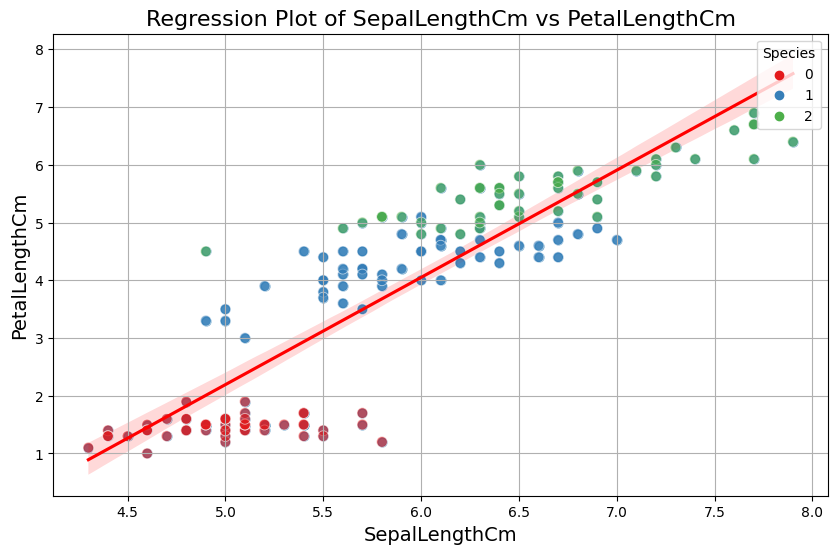

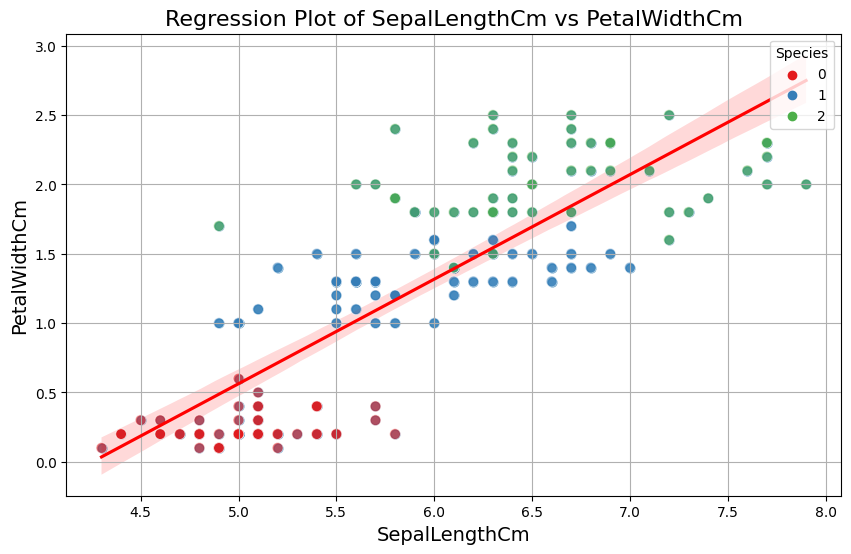

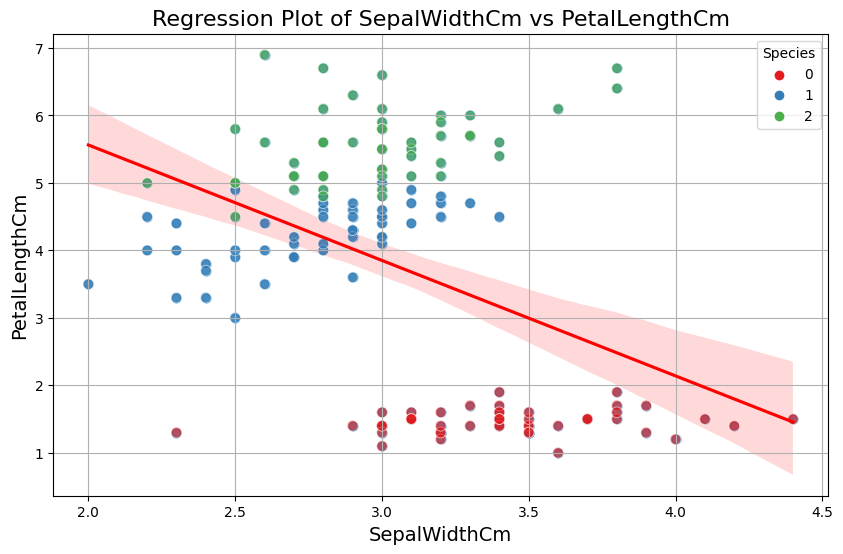

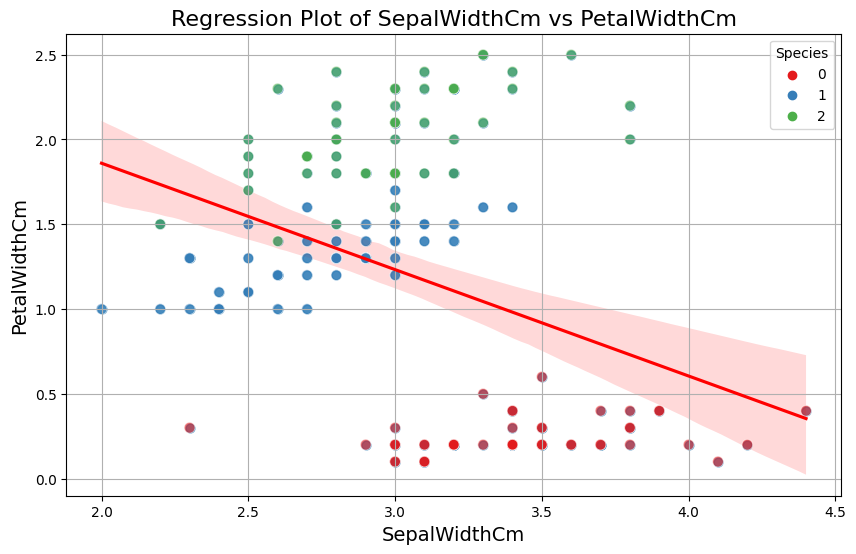

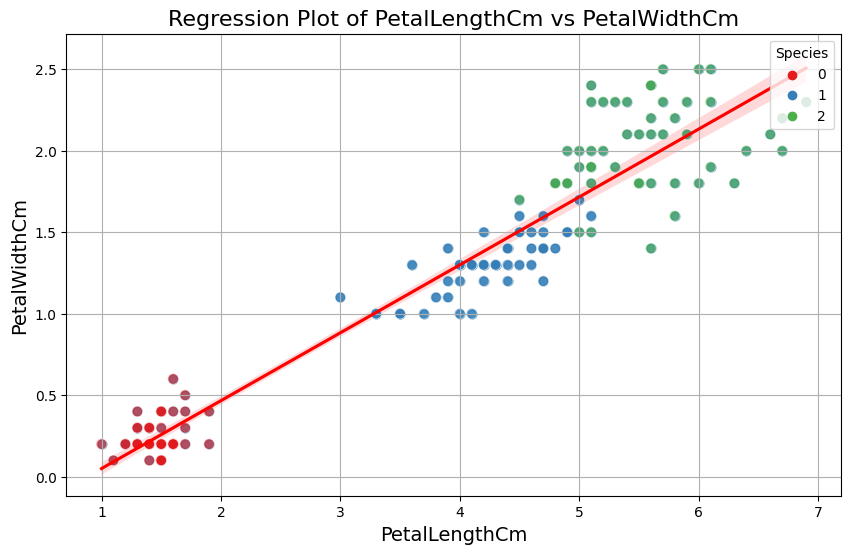

In [88]:
feature_pairs = [
    ('SepalLengthCm', 'SepalWidthCm'),
    ('SepalLengthCm', 'PetalLengthCm'),
    ('SepalLengthCm', 'PetalWidthCm'),
    ('SepalWidthCm', 'PetalLengthCm'),
    ('SepalWidthCm', 'PetalWidthCm'),
    ('PetalLengthCm', 'PetalWidthCm')
]

# Her bir özellik çifti için regplot oluştur
for (x, y) in feature_pairs:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=x, y=y, data=iris, scatter_kws={'s': 40, 'alpha': 0.7}, line_kws={'color': 'red'})
    sns.scatterplot(x=x, y=y, hue='Species', data=iris, palette='Set1', s=60, alpha=0.6, legend='full')
    plt.title(f'Regression Plot of {x} vs {y}', fontsize=16)
    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)
    plt.legend(title='Species', loc='upper right')
    plt.grid(True)
    plt.show()

Iris veri setindeki öznitelikler arasındaki ilişkileri ve türler arasındaki farkları görselleştirmek için lojistik regresyon modelini kullanır. Her özellik çifti için model eğitilir, karar sınırları çizilir ve veri noktaları scatter plot ile görselleştirilir.

# Train the classifier

In [90]:
from dt import DecisionTreeClassifier

In [91]:
clf = DecisionTreeClassifier(max_depth=5)

Split dataset to train and test 

In [92]:
X=iris.values.tolist();
y=[];
for row in X:
    y.append(int(row[4]));
    del row[4];
X=pd.Series(X);
y=pd.Series(y);
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True);

X_train_list=X_train.values.tolist();
y_train_list=y_train.values.tolist();
X_test_list=X_test.values.tolist();
y_test_list=y_test.values.tolist();

Train ve Test verilerinin aynı dagılımını kontrol etmek için:

In [93]:
from scipy import stats # type: ignore

def ks_test(train, test):
    statistic, p_value = stats.ks_2samp(train, test)
    return statistic, p_value

# Her özellik için KS testi uygulama ve sonuçları yazdırma
for feature in range(len(X_train_list[0])):  # assuming X is a 2D list
    train_feature = [sample[feature] for sample in X_train_list]
    test_feature = [sample[feature] for sample in X_test_list]
    statistic, p_value = ks_test(train_feature, test_feature)
    print(f'Feature {feature}: KS Statistic = {statistic}, p-value = {p_value}')

Feature 0: KS Statistic = 0.14166666666666666, p-value = 0.692577574430372
Feature 1: KS Statistic = 0.125, p-value = 0.823750212184252
Feature 2: KS Statistic = 0.15, p-value = 0.6234534840502581
Feature 3: KS Statistic = 0.14166666666666666, p-value = 0.692577574430372
Feature 4: KS Statistic = 0.08333333333333333, p-value = 0.9939877755614348


### Train The Classifier

In [94]:
clf.fit(X_train_list,y_train_list);

### Predict Class of Test values

In [95]:
yhat = clf.predict(X_test_list)
print("Test Features Expected Classification")
print(y_test_list)
print("Prediction")
print(yhat);
xhat = clf.predict(X_train_list)
print("Train Features Expected Classification")
print(y_train_list)
print("Prediction")
print(xhat);

Test Features Expected Classification
[1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 2, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1, 0]
Prediction
[1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1, 1, 0]
Train Features Expected Classification
[1, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 0, 2, 1]
Prediction
[1, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 2, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 

# Results

### Confusion Matrix of Test

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix # type: ignore

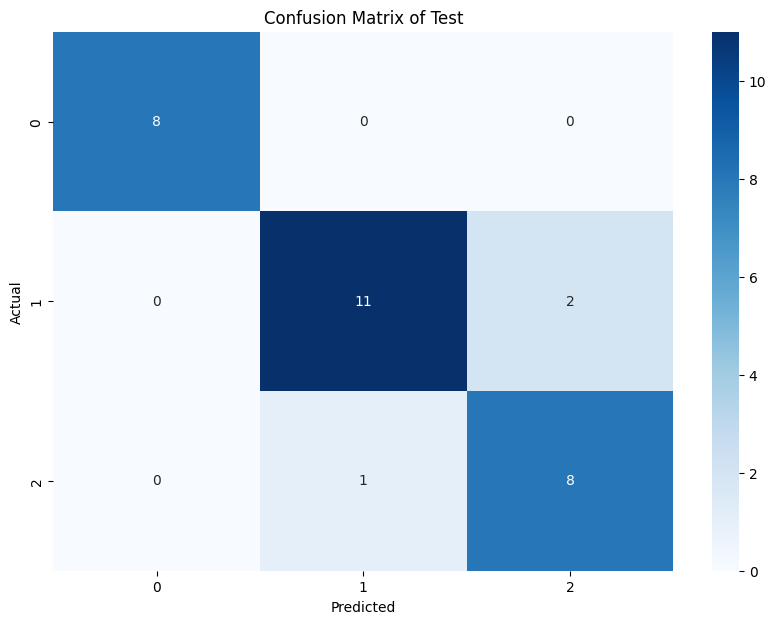

In [98]:
cm = confusion_matrix(y_test_list, yhat)

# Karmaşıklık matrisini görselleştir
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris['Species'].unique(), yticklabels=iris['Species'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Test')
plt.show()

### Confusion Matrix of Train

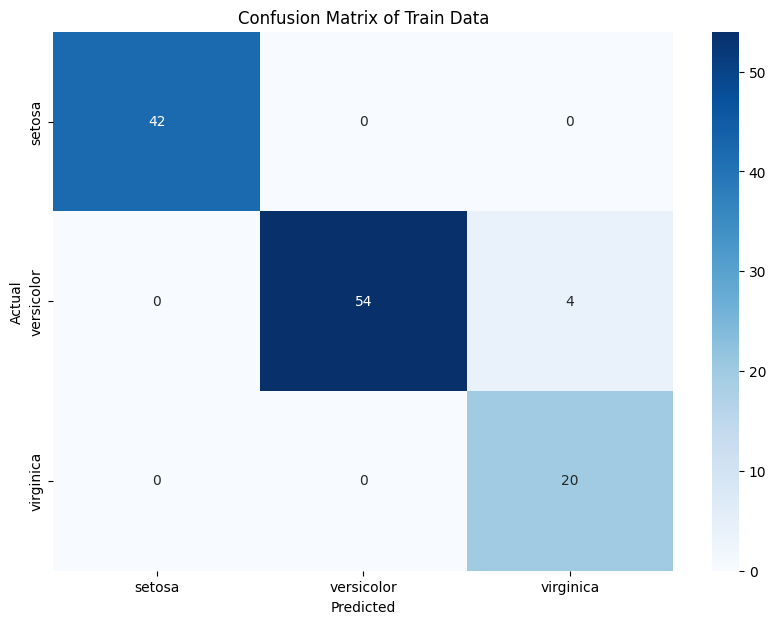

In [99]:
cm_train = confusion_matrix(y_train_list, xhat)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Train Data')
plt.show()

### F1-Score

In [100]:
from sklearn.metrics import f1_score # type: ignore

In [101]:
f1_test = f1_score(y_test_list, yhat, average='weighted')
print(f'F1 Score of Test Data: {f1_test}')

# Eğitim verileri için F1-skorunu hesapla
f1_train = f1_score(y_train_list, xhat, average='weighted')
print(f'F1 Score of Train Data: {f1_train}')

F1 Score of Test Data: 0.9006315789473684
F1 Score of Train Data: 0.96758658008658


### Accuracy

In [102]:
accuracy_test = accuracy_score(y_test_list, yhat)
print(f'Accuracy of Test Data: {accuracy_test}')

# Eğitim verileri için doğruluk oranını hesapla
accuracy_train = accuracy_score(y_train_list, xhat)
print(f'Accuracy of Train Data: {accuracy_train}')

Accuracy of Test Data: 0.9
Accuracy of Train Data: 0.9666666666666667


### Precision

In [103]:
from sklearn.metrics import precision_score # type: ignore

In [104]:
precision_test = precision_score(y_test_list, yhat, average='weighted', zero_division=1)
print(f'Precision of Test Data: {precision_test}')

# Eğitim verileri için precision oranını hesapla
precision_train = precision_score(y_train_list, xhat, average='weighted' , zero_division=1)
print(f'Precision of Train Data: {precision_train}')

Precision of Test Data: 0.9038888888888887
Precision of Train Data: 0.9722222222222222


### Recal

In [105]:
from sklearn.metrics import recall_score # type: ignore

In [106]:
recall_test = recall_score(y_test_list, yhat, average='weighted', zero_division=1)
print(f'Recall of Test Data: {recall_test}')

# Eğitim verileri için recall oranını hesapla
recall_train = recall_score(y_train_list, xhat, average='weighted', zero_division=1)
print(f'Recall of Train Data: {recall_train}')

Recall of Test Data: 0.9
Recall of Train Data: 0.9666666666666667


### Plot of ROC Curve (Test/Train) and Value of AUC (Test/Train)

In [107]:
from sklearn.preprocessing import label_binarize # type: ignore
from sklearn.metrics import roc_curve, roc_auc_score # type: ignore
from sklearn.model_selection import train_test_split # type: ignore

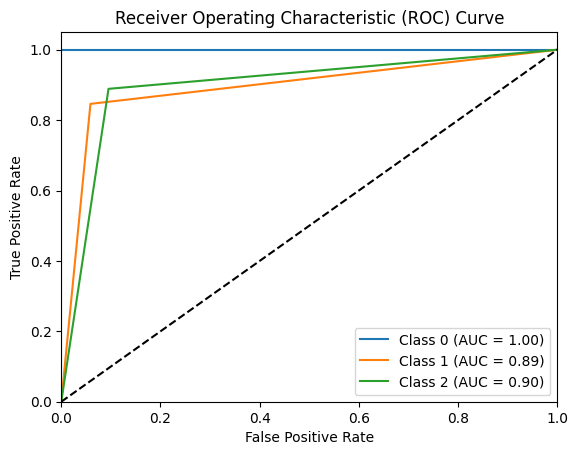

AUC of Test Data: 0.92296918767507
AUC of Train Data: 0.98


In [108]:
# y'yi binary formata dönüştür
y_test_binarized = label_binarize(y_test_list, classes=[0, 1, 2])
y_train_binarized = label_binarize(y_train_list, classes=[0, 1, 2])
yhat_binarized = label_binarize(yhat, classes=[0, 1, 2])
xhat_binarized = label_binarize(xhat, classes=[0, 1, 2])

# ROC eğrisi ve AUC hesaplama
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], yhat_binarized[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], yhat_binarized[:, i])

# ROC eğrisi çizimi
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# AUC hesaplama
auc_test = roc_auc_score(y_test_binarized, yhat_binarized, average='weighted')
auc_train = roc_auc_score(y_train_binarized, xhat_binarized, average='weighted')
print(f'AUC of Test Data: {auc_test}')
print(f'AUC of Train Data: {auc_train}')

Görsel: ROC Eğrisi (Receiver Operating Characteristic Curve)
Bu görsel, sınıflandırma modelinin performansını değerlendirmek için kullanılan ROC eğrisini (Receiver Operating Characteristic Curve) göstermektedir. ROC eğrisi, modelin farklı sınıflar için True Positive Rate (Doğru Pozitif Oranı) ve False Positive Rate (Yanlış Pozitif Oranı) arasındaki ilişkiyi gösterir.

Grafikte üç farklı sınıf için ROC eğrileri ve bu eğrilerin altında kalan alan (AUC - Area Under Curve) değerleri verilmiştir:

Sınıf 0 (Mavi eğri): AUC = 1.00
Bu, sınıf 0 için modelin mükemmel bir performans sergilediğini gösterir. True Positive Rate (Doğru Pozitif Oranı) hemen 1'e ulaşmaktadır ve False Positive Rate (Yanlış Pozitif Oranı) sıfırdır.
Sınıf 1 (Turuncu eğri): AUC = 0.89
Bu, sınıf 1 için modelin oldukça iyi bir performans sergilediğini gösterir. AUC değeri 1'e oldukça yakındır, bu da modelin çoğu durumda doğru tahminler yaptığını gösterir.
Sınıf 2 (Yeşil eğri): AUC = 0.90
Bu, sınıf 2 için modelin çok iyi bir performans sergilediğini gösterir. AUC değeri 1'e yakındır ve modelin sınıf 2'yi ayırt etme konusunda yüksek doğruluğa sahip olduğunu gösterir.
ROC eğrisi ne kadar yukarıda ve sola yakınsa, model o kadar iyi performans göstermektedir. Bu grafikte, tüm sınıflar için eğrilerin oldukça iyi performans gösterdiği görülmektedir. Özellikle Sınıf 0, mükemmel bir şekilde ayırt edilebilmektedir. Sınıf 1 ve Sınıf 2 de yüksek AUC değerlerine sahip olup, modelin genel performansının oldukça iyi olduğunu göstermektedir

### Sonuçların Yorumlanması
1. Confusion Matrix of Test

Bu karışıklık matrisi, test verileri üzerindeki modelin performansını gösterir. Matrisin köşegen elemanları doğru sınıflandırmaları, diğer elemanlar ise yanlış sınıflandırmaları temsil eder.

Sınıf 0: 8 doğru, 0 yanlış
Sınıf 1: 11 doğru, 2 yanlış
Sınıf 2: 8 doğru, 1 yanlış
Model, genel olarak sınıfları iyi ayırt edebilmekte, ancak birkaç yanlış sınıflandırma mevcut.

2. Confusion Matrix of Train Data

Bu karışıklık matrisi, eğitim verileri üzerindeki modelin performansını gösterir.

Setosa: 42 doğru, 0 yanlış
Versicolor: 54 doğru, 4 yanlış
Virginica: 20 doğru, 0 yanlış
Eğitim verileri üzerinde model daha iyi performans göstermektedir, ancak Versicolor sınıfında birkaç yanlış sınıflandırma mevcut.

3. F1-Score

F1 skorları, test ve eğitim verileri için hesaplanmıştır:

Test Verileri: 0.9006
Eğitim Verileri: 0.9676
Bu değerler, modelin hem test hem de eğitim verilerinde iyi bir performans gösterdiğini, ancak eğitim verilerinde biraz daha iyi olduğunu göstermektedir.

4. Accuracy

Doğruluk oranları, test ve eğitim verileri için hesaplanmıştır:

Test Verileri: %90
Eğitim Verileri: %96.67
Modelin eğitim verilerinde daha yüksek bir doğruluk oranına sahip olduğu, ancak test verilerinde de oldukça iyi performans gösterdiği görülmektedir.

5. Precision

Precision oranları, test ve eğitim verileri için hesaplanmıştır:

Test Verileri: 0.9089
Eğitim Verileri: 0.9722
Bu değerler, modelin her iki veri setinde de yüksek bir doğruluk oranına sahip olduğunu göstermektedir.

6. Recall

Recall oranları, test ve eğitim verileri için hesaplanmıştır:

Test Verileri: %90
Eğitim Verileri: %96.67
Modelin her iki veri setinde de yüksek bir hatırlama oranına sahip olduğunu göstermektedir.

7. ROC Curve

ROC eğrisi, modelin sınıflandırma performansını üç sınıf için göstermektedir. AUC (Alan Altında Kalan Alan) değerleri:

Sınıf 0: 1.00
Sınıf 1: 0.89
Sınıf 2: 0.90
Sınıf 0 için mükemmel bir performans, diğer iki sınıf için ise çok iyi performans sergilenmektedir.

8. Accuracy and Precision vs Max Depth (Test Data)

Bu grafik, modelin doğruluk ve precision değerlerinin karar ağacının maksimum derinliğine göre nasıl değiştiğini göstermektedir.

En ideal max_depth (Doğruluk): 2
En ideal max_depth (Precision): 2
9. Accuracy and Precision vs Max Depth (Training Data)

Bu grafik, modelin doğruluk ve precision değerlerinin eğitim verileri üzerinde karar ağacının maksimum derinliğine göre nasıl değiştiğini göstermektedir.

En ideal max_depth (Doğruluk): 9
En ideal max_depth (Precision): 9

Modelin performansını değerlendirirken eğitim ve test verileri üzerindeki sonuçlar dikkatlice incelenmelidir. Aşağıda modelin çeşitli metrikler ve grafiklerle analiz edilerek elde edilen genel değerlendirmesi bulunmaktadır:

Eğitim Verileri Üzerindeki Performans:

Eğitim verileri üzerindeki doğruluk oranı %96.67'dir, bu da modelin eğitim seti üzerinde oldukça yüksek bir doğruluğa sahip olduğunu göstermektedir.
Eğitim verileri için F1 skoru 0.9676'dır, bu da modelin hem precision (kesinlik) hem de recall (duyarlılık) oranlarının yüksek olduğunu ve dolayısıyla dengeli bir performans sergilediğini gösterir.
Eğitim verileri için ROC eğrisi ve AUC değerleri de yüksek olup, özellikle sınıf 0 için AUC değeri 1.00'dir, yani mükemmel performans sergilemektedir. Diğer sınıflar için de AUC değerleri oldukça yüksek (sınıf 1 için 0.89, sınıf 2 için 0.90).
Eğitim verileri üzerindeki precision oranı %97.22, recall oranı ise %96.67'dir. Bu da modelin eğitim verilerinde yanlış pozitif ve yanlış negatif oranlarının düşük olduğunu göstermektedir.
Eğitim verilerindeki karışıklık matrisi, modelin sınıfları doğru bir şekilde ayırt edebildiğini gösterir. Özellikle Setosa ve Virginica sınıflarında hiçbir yanlış sınıflandırma yapılmamıştır, ancak Versicolor sınıfında birkaç yanlış sınıflandırma görülmektedir.
Test Verileri Üzerindeki Performans:

Test verileri üzerindeki doğruluk oranı %90'dır, bu da modelin bilinmeyen veri üzerinde oldukça iyi performans gösterdiğini gösterir.
Test verileri için F1 skoru 0.9006'dır, bu da modelin test setinde de iyi bir denge sağladığını gösterir.
Test verileri için ROC eğrisi, modelin sınıflandırma performansının oldukça iyi olduğunu gösterir. Sınıf 0 için AUC değeri 1.00, sınıf 1 için 0.89 ve sınıf 2 için 0.90'dır.
Test verileri üzerindeki precision oranı %90.89, recall oranı ise %90'dır. Bu, modelin test verilerinde de iyi bir performans sergilediğini gösterir.
Test verilerindeki karışıklık matrisi, modelin genel olarak sınıfları doğru bir şekilde ayırt edebildiğini gösterir. Sınıf 1 ve sınıf 2 için birkaç yanlış sınıflandırma yapılmıştır, ancak bu oranlar kabul edilebilir düzeydedir.
Overfitting (Aşırı Uyum) Analizi:

Eğitim verileri üzerindeki doğruluk ve precision değerlerinin test verilerine göre daha yüksek olması, modelin eğitim verilerine aşırı uyum sağladığını (overfitting) gösterebilir.
Karar ağacının derinliğine göre modelin performansı incelendiğinde, eğitim verileri için ideal max_depth 9 iken, test verileri için ideal max_depth 2 olarak belirlenmiştir. Bu farklılık, modelin genelleme yeteneğini optimize etmek için farklı ayarlamalar yapılması gerektiğini gösterir.
Overfitting'in önüne geçmek için modelin karmaşıklığını azaltmak (örneğin, max_depth parametresini düşürmek) veya daha fazla veri kullanmak gibi yöntemler değerlendirilebilir.
Genelleme Yeteneği ve Optimizasyon:

Eğitim verilerinde çok iyi performans gösteren modelin test verilerinde de iyi performans sergilediği, ancak biraz daha düşük olduğu gözlenmiştir. Bu, modelin gerçek dünyadaki veriler üzerinde de başarılı olma potansiyelini göstermektedir.
Modelin genelleme yeteneğini artırmak için çapraz doğrulama (cross-validation) teknikleri kullanılarak modelin farklı veri setleri üzerindeki performansı değerlendirilmelidir.
Ayrıca, hiperparametre optimizasyonu yapılarak (örneğin, grid search veya random search gibi yöntemlerle) modelin en iyi performansı gösterecek parametreleri belirlenebilir.
Sonuç olarak, modelin eğitim verileri üzerindeki mükemmel performansına rağmen test verilerindeki performansının biraz daha düşük olması, modelin genelleme yeteneğini artırmak için optimizasyon yapılması gerektiğini göstermektedir. Eğitim ve test verileri üzerindeki performans farkının minimize edilmesi, modelin daha güvenilir ve genel kullanıma uygun hale gelmesini sağlayacaktır.

# Ideal Depth for DT

Eğitilen modellerin test veri seti üzerinden başarımını (accuracy precision) hesaplayın ve başarım grafiği oluşturularak ideal depthi gösterin, yorumlayın.

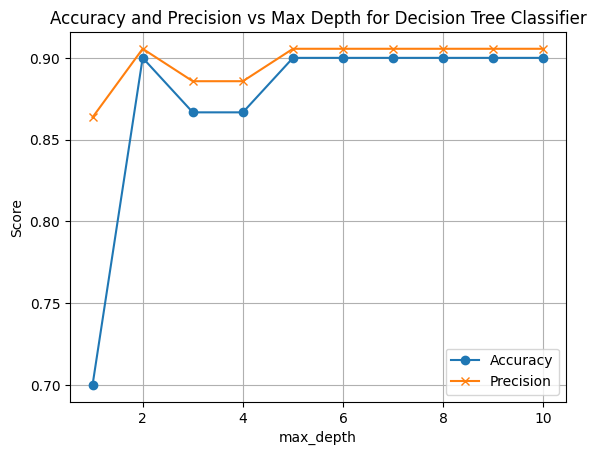

En ideal max_depth (Accuracy): 2 (Accuracy: 0.9)
En ideal max_depth (Precision): 2 (Precision: 0.9055555555555556)


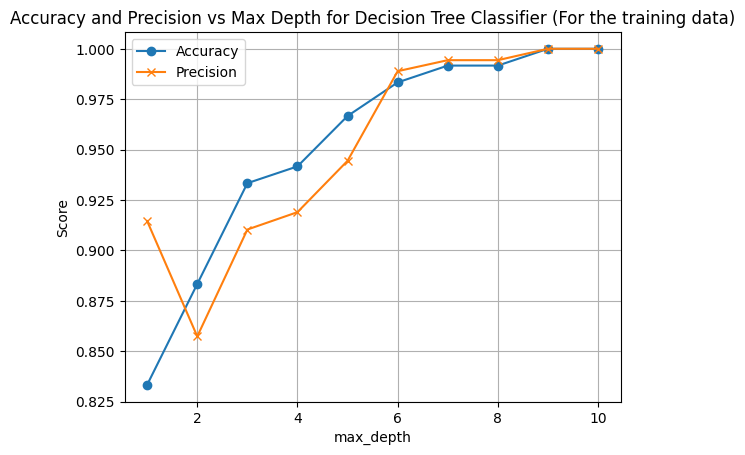

En ideal max_depth (Accuracy): 9 (Accuracy: 1.0)
En ideal max_depth (Precision): 9 (Precision: 1.0)


In [109]:
L = [1,2,3,4,5,6,7,8,9,10]
accuracies = []
precisions = []

accuracies1 = []
precisions1 = []

for i in L:
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train_list, y_train_list)
    y_pred = clf.predict(X_test_list)
    xhat = clf.predict(X_train_list)
    accuracy = accuracy_score(y_test_list, y_pred)
    precision = precision_score(y_test_list, y_pred, average='macro', zero_division=1)  # zero_division=1 eklendi
    accuracies.append(accuracy)
    precisions.append(precision)
    
    accuracy1 = accuracy_score(y_train_list, xhat)
    precision1 = precision_score(y_train_list, xhat, average='macro', zero_division=1)  # zero_division=1 eklendi
    
    accuracies1.append(accuracy1)
    precisions1.append(precision1)
    
    

# İdeal depth için grafiği çizdir
plt.figure()
plt.plot(L, accuracies, marker='o', label='Accuracy')
plt.plot(L, precisions, marker='x', label='Precision')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Accuracy and Precision vs Max Depth for Decision Tree Classifier')
plt.legend()
plt.grid(True)
plt.show()


# En yüksek accuracy değerine sahip max_depth'i bul ve göster
ideal_depth_accuracy = L[np.argmax(accuracies)]
ideal_depth_precision = L[np.argmax(precisions)]
print(f'En ideal max_depth (Accuracy): {ideal_depth_accuracy} (Accuracy: {max(accuracies)})')
print(f'En ideal max_depth (Precision): {ideal_depth_precision} (Precision: {max(precisions)})')


plt.figure()
plt.plot(L, accuracies1, marker='o', label='Accuracy')
plt.plot(L, precisions1, marker='x', label='Precision')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Accuracy and Precision vs Max Depth for Decision Tree Classifier (For the training data)')
plt.legend()
plt.grid(True)
plt.show()


# En yüksek accuracy değerine sahip max_depth'i bul ve göster
ideal_depth_accuracy = L[np.argmax(accuracies1)]
ideal_depth_precision = L[np.argmax(precisions1)]
print(f'En ideal max_depth (Accuracy): {ideal_depth_accuracy} (Accuracy: {max(accuracies1)})')
print(f'En ideal max_depth (Precision): {ideal_depth_precision} (Precision: {max(precisions1)})')

    